#  Ford GoBike System Data 

## Investigation Overview

>In this investigation, I wanted to look at the characteristics of diamonds that could be used to predict their prices. The main focus was on the four Cs of diamonds: carat (weight), cut grade, color grade, and clarity grade.

## Dataset Overview

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area,Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.


In [584]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [585]:
# load in the dataset into a pandas dataframe
Ford_GoBike = pd.read_csv("201902-fordgobike-tripdata.csv")

## 1. What Is the Day Has The Most Trips?

In [606]:
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

<Figure size 1080x720 with 0 Axes>

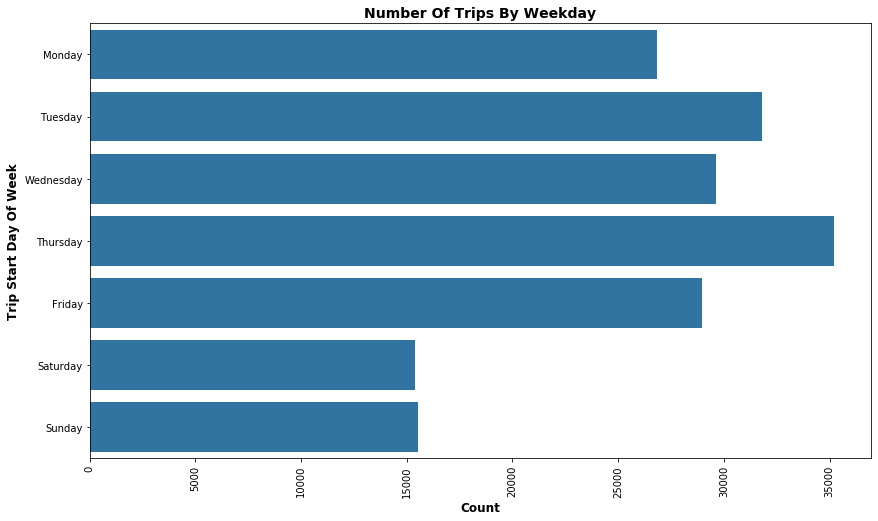

In [607]:
plt.figure(figsize=[14, 8])

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
FordGoBike['start_day_of_week'] = FordGoBike['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=FordGoBike, y='start_day_of_week', color=base_color);

plt.title('Number of Trips by weekday'.title(),fontsize = 14, weight = "bold")
plt.xlabel('Count'.title(),fontsize = 12, weight = "bold");
plt.ylabel('Trip Start Day of Week'.title(),fontsize = 12, weight = "bold");
plt.xticks(rotation = 90);

This graph show what is the weekdays has the most trips. and it appears the most trips was on **Thursday** and **Tuesday**.
and the lowest days was on **Saturday** and **Sunday**.

## 2. what is the Most Majority User Type?

(-1.1064183360400863,
 1.105935178635703,
 -1.1011591870243223,
 1.111194327651467)

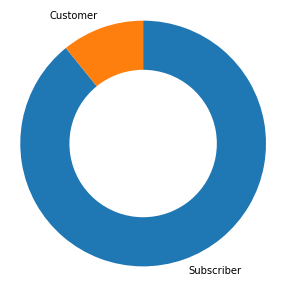

In [608]:
plt.figure(figsize=[10, 5])

sorted_counts = FordGoBike['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

This graph show what is the most majority user type and this show represent the majority is to **Subscribers**.

## 3. What Is the Duration Of Most Of The Trips In Minutes?

Text(0, 0.5, 'Count Of Trip')

<Figure size 1008x576 with 0 Axes>

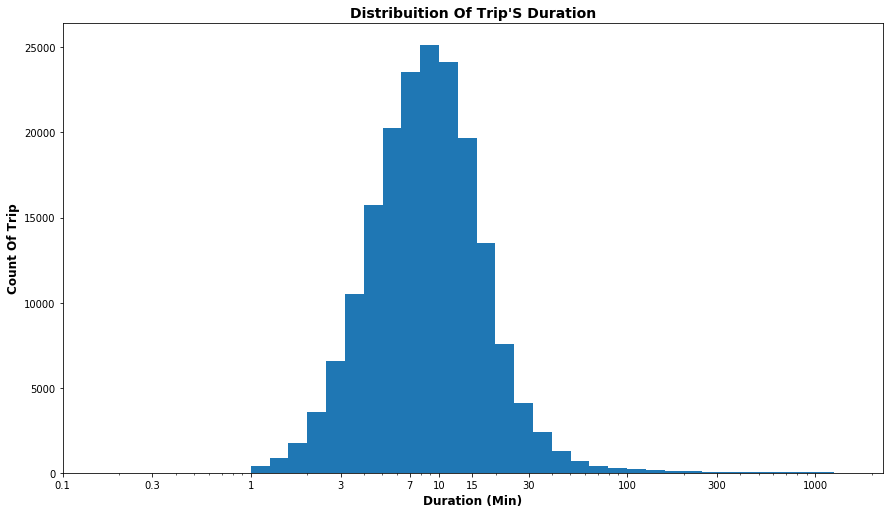

In [609]:
plt.figure(figsize=[14, 8])

plt.figure(figsize=[14.70, 8.27])
bins = 10 ** np.arange(0,3.15+0.1,0.1)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = FordGoBike, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

plt.title("Distribuition of trip's duration".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Duration (min)'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count of trip'.title(),
               fontsize = 12, weight = "bold")

This chart shows that the most of trips has a duration in range of 5 to 20 minutes and it's unimodal graph.

## Bivariate Exploration


Performing a Bivariate Exploration for some relationship between are the features and find some anwsers to our questions.

## 4. What is the average trips over weekdays in Minutes?

Text(0, 0.5, 'Average Trio duration (min)')

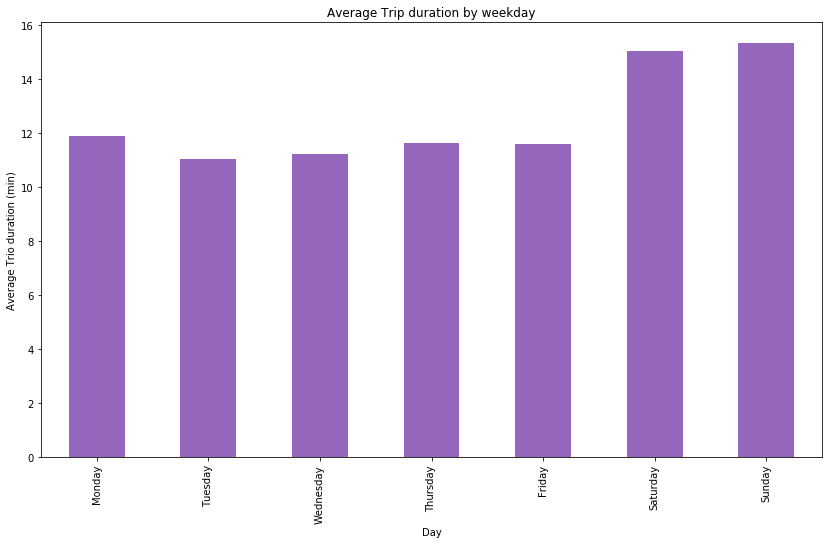

In [610]:
plt.figure(figsize=[14, 8])

base_color = sb.color_palette()[4]
FordGoBike.groupby('start_day_of_week')['duration_min'].mean().plot(kind = "bar", color = base_color);

plt.title("Average Trip duration by weekday")
plt.xlabel('Day')
plt.ylabel('Average Trio duration (min)')

This chart shows that the average trips start on Monday to Friday lowest  trips duration compared to weekends While On Saturday and Sunday the high duration time.

In [611]:
#Average of trips duration by weekday
print(FordGoBike.groupby('start_day_of_week')['duration_min'].mean())

start_day_of_week
Monday       11.885994
Tuesday      11.055093
Wednesday    11.227853
Thursday     11.650683
Friday       11.596585
Saturday     15.044367
Sunday       15.329101
Name: duration_min, dtype: float64


**Violin plots Visualization**

In [612]:
#As the duration time of Trips are widely, I will choose to do these two subcut in the data frams. 
DurationSub100 = FordGoBike.loc[FordGoBike['duration_min'] <= 100]
DurationSub45 = FordGoBike.loc[FordGoBike['duration_min'] <= 45]

Text(0, 0.5, 'Duration of Trips (min)')

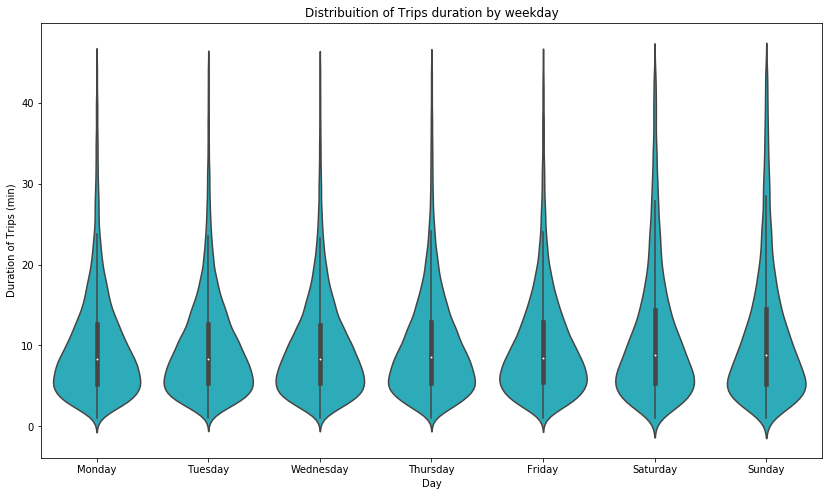

In [613]:
plt.figure(figsize=[14, 8])

base_color = sb.color_palette()[9]

sb.violinplot(data = DurationSub45, x = 'start_day_of_week', y = 'duration_min',
              color = base_color);
plt.title("Distribuition of Trips duration by weekday")
plt.xlabel('Day')
plt.ylabel('Duration of Trips (min)')

**Box Plot Visualization**


Text(0, 0.5, 'Duration of Trips (min)')

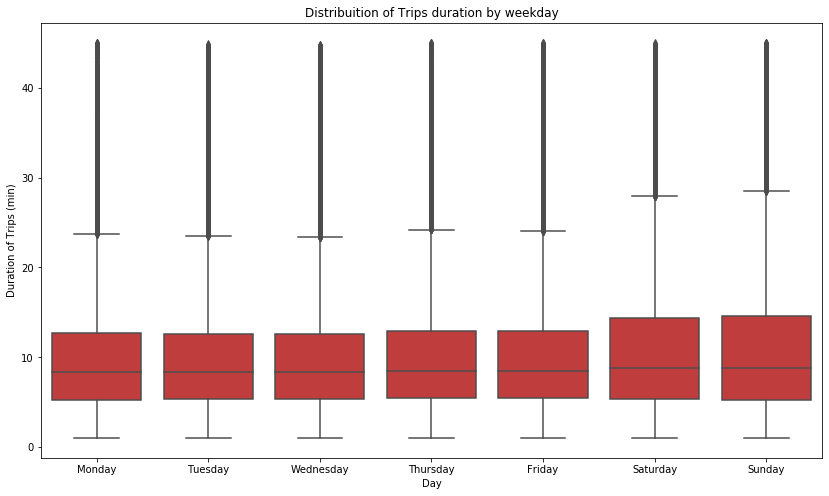

In [614]:
plt.figure(figsize=[14, 8])
base_color = sb.color_palette()[3]

sb.boxplot(data = DurationSub45, x = 'start_day_of_week', y = 'duration_min',
              color = base_color);
plt.title("Distribuition of Trips duration by weekday")
plt.xlabel('Day')
plt.ylabel('Duration of Trips (min)')

This chart shows that the average duration on weekends higher than weekdays, on weekdays appears the average duration is almost between 15 to 17 minutes, while  weekends it more that 26 mintues.

## 5. Reference to previous question if the User Type is Customer or Subscriber?

Text(0, 0.5, 'Day')

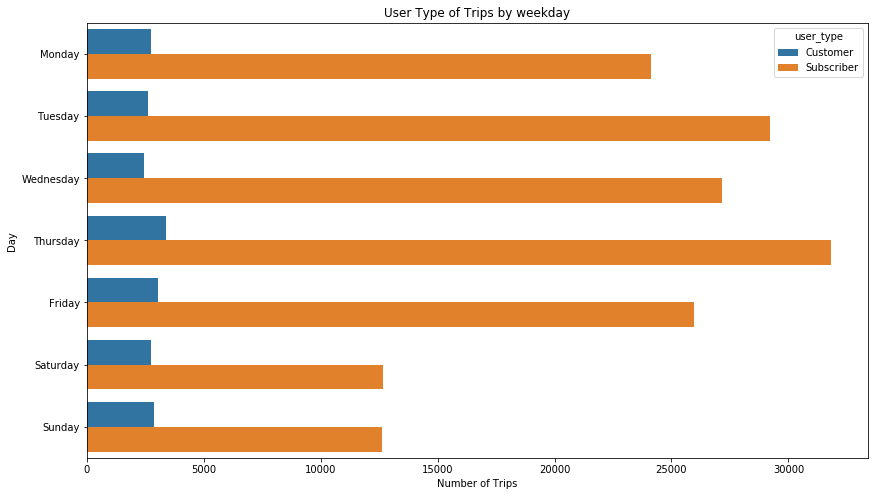

In [615]:
plt.figure(figsize=[14, 8])
sb.countplot(data = FordGoBike, y='start_day_of_week', hue = 'user_type');
plt.title("User Type of Trips by weekday")
plt.xlabel('Number of Trips')
plt.ylabel('Day')

This chart shows that the user type most type to sybsciribers and the lowest to customer depends on the average duration.

## 6.What is the most peak time for trips?

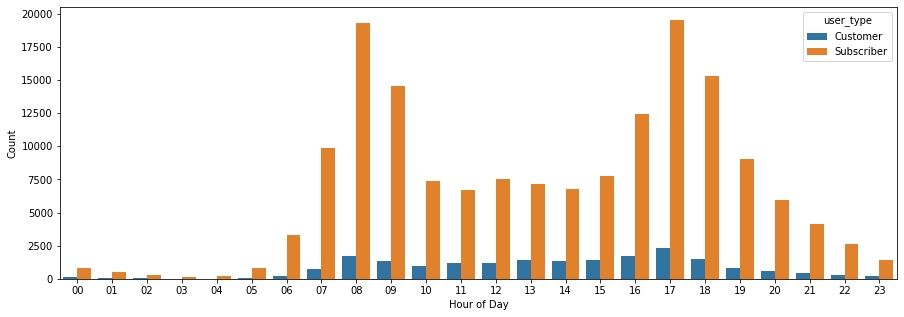

In [616]:
plt.figure(figsize=[15, 5])
sb.countplot(data=FordGoBike, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

This chart shows that the most peak times on two different time start from **07:00 to 10:00** and the second peak time **16:00 to 18:00.**


## 7.Which User Type takes long Duration for Trips?

Text(0, 0.5, 'Duration of Trips (min)')

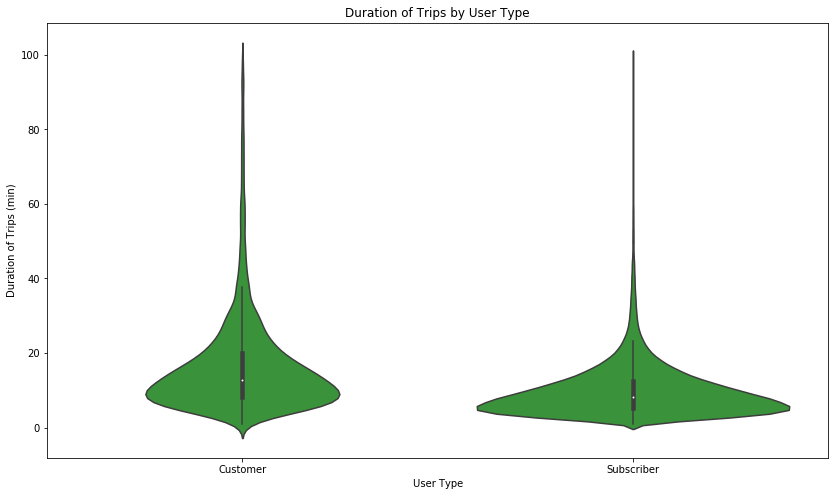

In [617]:
plt.figure(figsize=[14, 8])

base_color = sb.color_palette()[2]
sb.violinplot(data = DurationSub100, x = 'user_type', y = 'duration_min',
              color = base_color)

plt.title("Duration of Trips by User Type")
plt.xlabel('User Type')
plt.ylabel('Duration of Trips (min)')

This chart shows that subscribers and costumers have a significantly difference in trips duration.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The trips pattern different between subscribers and customers While we seen the subscribers higher than customers as user type. thus most trips ware on workdays from Monday to Friday and show during peak time start from 07:00 to 10:00 and the second peak time 16:00 to 18:00.

### Were there any interesting or surprising interactions between features?

> the interesting the to see ages that higher than 60 and the median. they did trips in peak times!! 

## Multivariate Exploration

## 8. The average trip duration on weekdays between customers and subscribers?

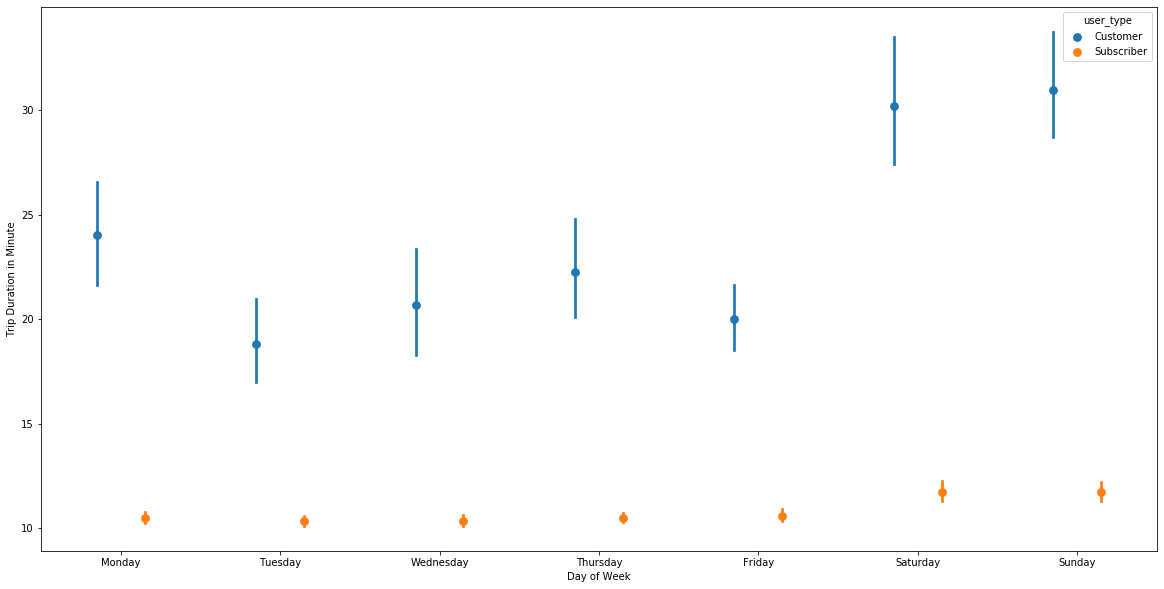

In [555]:
plt.figure(figsize=[20, 10])
sb.pointplot(data=FordGoBike, x='start_day_of_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Minute');

This chart show that the subscribers trips shorter than customers on weekdays. both user type have an obvious increased in trip duraction on Saturday and Sunday over weekends

## 9. How does affect the hours days usage with member age for customers and subscribers?

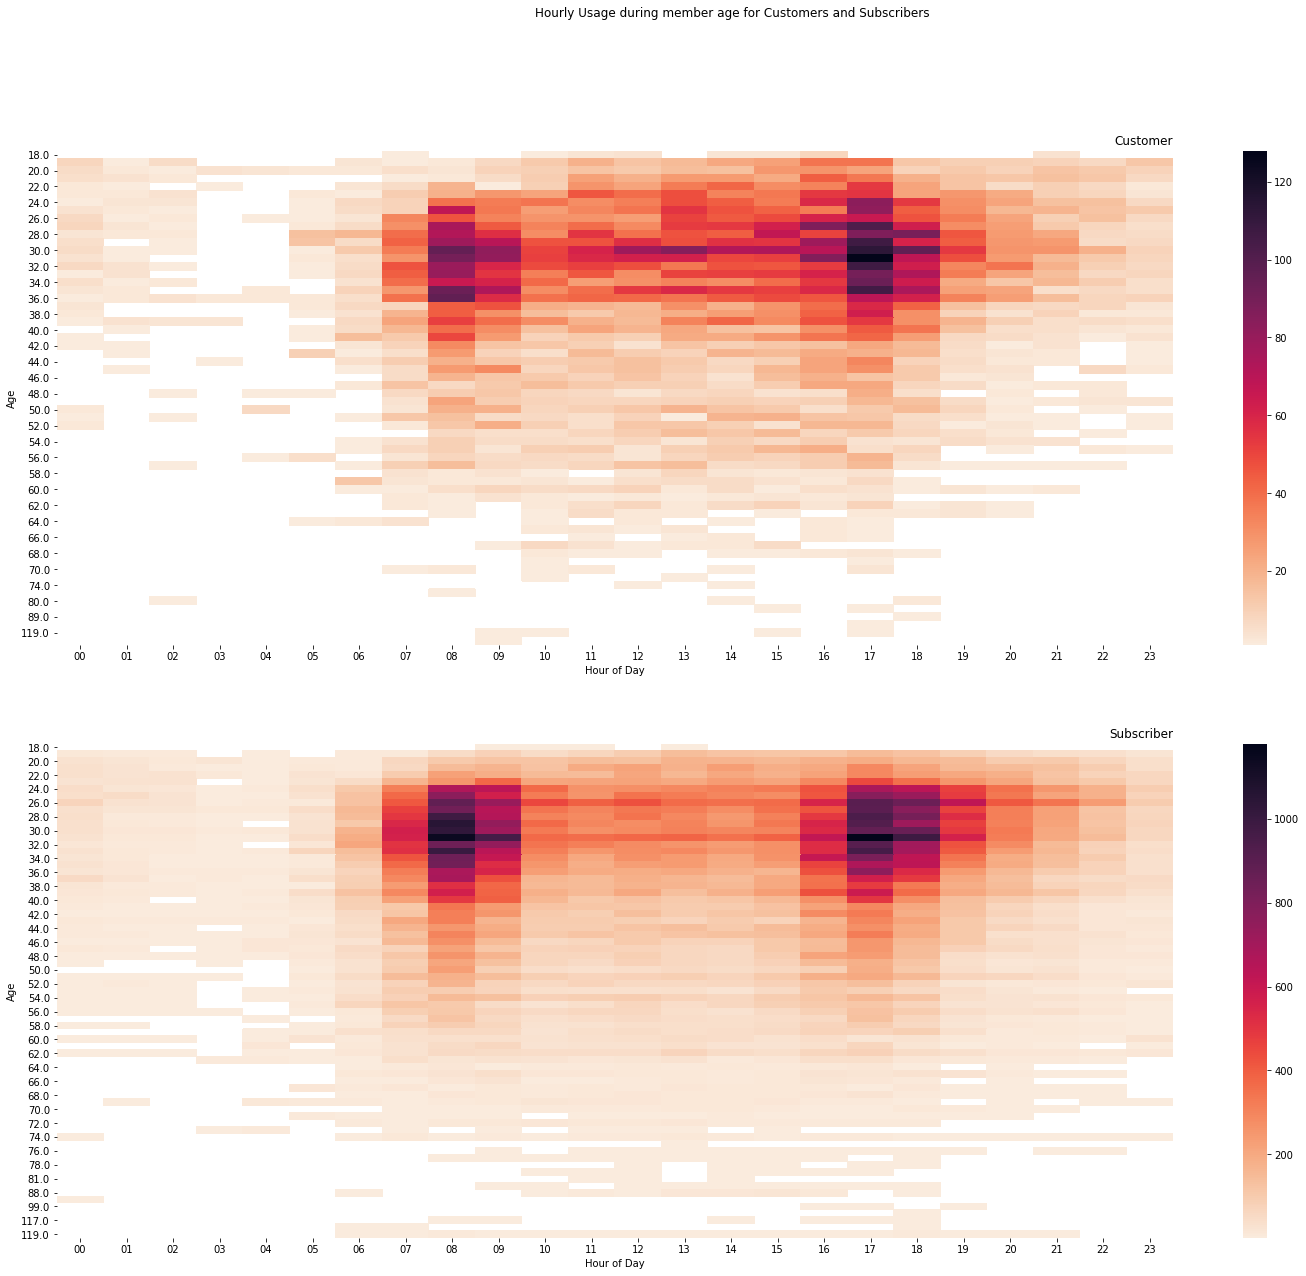

In [546]:
plt.figure(figsize=[25, 20])

plt.suptitle('Hourly Usage during member age for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = FordGoBike.query('user_type == "Customer"')
ct_counts = customers.groupby(['member_age', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='member_age', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Age');

plt.subplot(2, 1, 2)
subscribers = FordGoBike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['member_age', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='member_age', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Age');

Those charts show that different pattern between type of trips and member age and peak times.  the Subscribers most use the trips on workdays while customers on weekend. while appears member ages between 24 to 36 on peak times.Many trips concentrated around 08:00 to 09:00 in the morning and 17:00 to 18:00 in the afternoon on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17:00. 

In [ ]:
!jupyter nbconvert "slide_deck_Ford-GoBike-System-Data.ipynb" --to slides --post serve --template output_toggle